
# Multi-objective Bayesian Optimization


TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
%reset -f
import numpy as np

import torch
from xopt import XoptBase, Evaluator
from xopt.generators.bayesian import MOBOGenerator
from xopt.resources.test_functions.tnk import evaluate_TNK, tnk_vocs

import pandas as pd

evaluator = Evaluator(evaluate_TNK)
print(tnk_vocs.dict())

{'variables': {'x1': [0.0, 3.14159], 'x2': [0.0, 3.14159]}, 'constraints': {'c1': ['GREATER_THAN', 0.0], 'c2': ['LESS_THAN', 0.5]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': None}


In [2]:
generator = MOBOGenerator(tnk_vocs)
generator.options.n_initial=2,
generator.options.optim.num_restarts = 1
generator.options.optim.raw_samples = 20

generator.options.acq.proximal_lengthscales=[1.0,1.0]
X = XoptBase(generator=generator, evaluator=evaluator, vocs=tnk_vocs)
X.step()
for i in range(50):
    print(i)
    X.step()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [3]:
X.generator.data

,x1,x2,a,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
0,0.231868,2.011817,dummy_constant,0.231868,2.011817,3.127376,2.357485,"[1, 2, 3]",False,
1,0.031178,2.011380,dummy_constant,0.031178,2.011380,2.949682,2.504064,"[1, 2, 3]",False,
2,0.000000,1.505639,dummy_constant,0.000000,1.505639,1.166948,1.261309,"[1, 2, 3]",False,
3,0.000000,1.300616,dummy_constant,0.000000,1.300616,0.591602,0.890986,"[1, 2, 3]",False,
4,0.000000,1.058123,dummy_constant,0.000000,1.058123,0.019625,0.561501,"[1, 2, 3]",False,
5,0.000000,0.827749,dummy_constant,0.000000,0.827749,-0.414832,0.357419,"[1, 2, 3]",False,
6,0.000000,0.167844,dummy_constant,0.000000,0.167844,-1.071828,0.360328,"[1, 2, 3]",False,
7,0.370395,0.328704,dummy_constant,0.370395,0.328704,-0.812681,0.046140,"[1, 2, 3]",False,
8,0.775828,0.450597,dummy_constant,0.775828,0.450597,-0.141521,0.078522,"[1, 2, 3]",False,
9,0.237214,0.982446,dummy_constant,0.237214,0.982446,0.101134,0.301811,"[1, 2, 3]",False,


## plot results


In [ ]:

import matplotlib.pyplot as plt

fig,ax = plt.subplots()

theta = np.linspace(0,np.pi/2)
r = np.sqrt(1 + 0.1*np.cos(16*theta))
x_1 = r*np.sin(theta)
x_2_lower = r*np.cos(theta)
x_2_upper = (0.5 - (x_1 - 0.5)**2)**0.5 + 0.5

z = np.zeros_like(x_1)

#ax2.plot(x_1, x_2_lower,'r')
ax.fill_between(x_1, z, x_2_lower, fc='white')
circle = plt.Circle((0.5, 0.5), 0.5**0.5,
                    color='r', alpha=0.25, zorder=0,
                    label='Valid Region')
ax.add_patch(circle)
history = pd.concat([X.data, tnk_vocs.feasibility_data(X.data)], axis=1, ignore_index=False)



ax.plot(*history[["x1","x2"]][history["feasible"]].to_numpy().T,'.C1')
ax.plot(*history[["x1","x2"]][~history["feasible"]].to_numpy().T,'.C2')

ax.set_xlim(0, 3.14)
ax.set_ylim(0, 3.14)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_aspect('equal')

### Plot path through input space

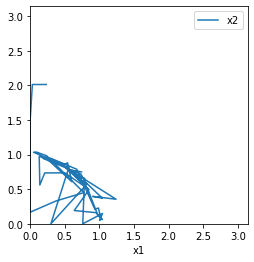

In [9]:
ax = history.plot("x1","x2")
ax.set_ylim(0,3.14)
ax.set_xlim(0, 3.14)
ax.set_aspect("equal")

C:\ProgramData\Miniconda3\envs\xopt\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[[0.49204511 0.72219603]]


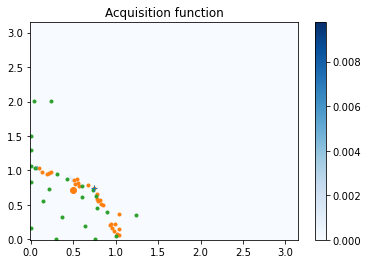

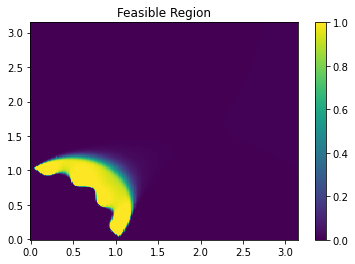

In [6]:
# plot the acquisition function
from xopt.generators.bayesian.utils import feasibility
bounds = generator.vocs.bounds
generator.train_model()
model = generator.model

# create mesh
n = 200
x = torch.linspace(*bounds.T[0],n)
y = torch.linspace(*bounds.T[1],n)
xx,yy = torch.meshgrid(x,y)
pts = torch.hstack([ele.reshape(-1,1) for ele in (xx,yy)]).double()

acq_func = generator.get_acquisition(model)
with torch.no_grad():
    acq_pts = pts.unsqueeze(1)
    acq = acq_func(acq_pts)

    fig, ax = plt.subplots()
    c = ax.pcolor(xx,yy,acq.reshape(n,n), cmap='Blues')
    fig.colorbar(c)
    ax.set_title('Acquisition function')

    ax.plot(*history[["x1","x2"]][history["feasible"]].to_numpy().T,'.C1')
    ax.plot(*history[["x1","x2"]][~history["feasible"]].to_numpy().T,'.C2')

    ax.plot(*history[["x1","x2"]].to_numpy()[-1].T,'+')

    feas = feasibility(
        pts.unsqueeze(1),
        model,
        generator.sampler,
        tnk_vocs
    ).flatten()

    fig2, ax2 = plt.subplots()
    c = ax2.pcolor(xx,yy,feas.reshape(n,n))
    fig2.colorbar(c)
    ax2.set_title('Feasible Region')

candidate = generator.generate(1)
print(candidate[["x1","x2"]].to_numpy())
ax.plot(*candidate[["x1","x2"]].to_numpy()[0],'o')

In [7]:
candidate = generator.generate(1)